# Thompson Sampling

## Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from pandas.core.frame import DataFrame

## Importing the Dataset

In [3]:
dataset: DataFrame = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

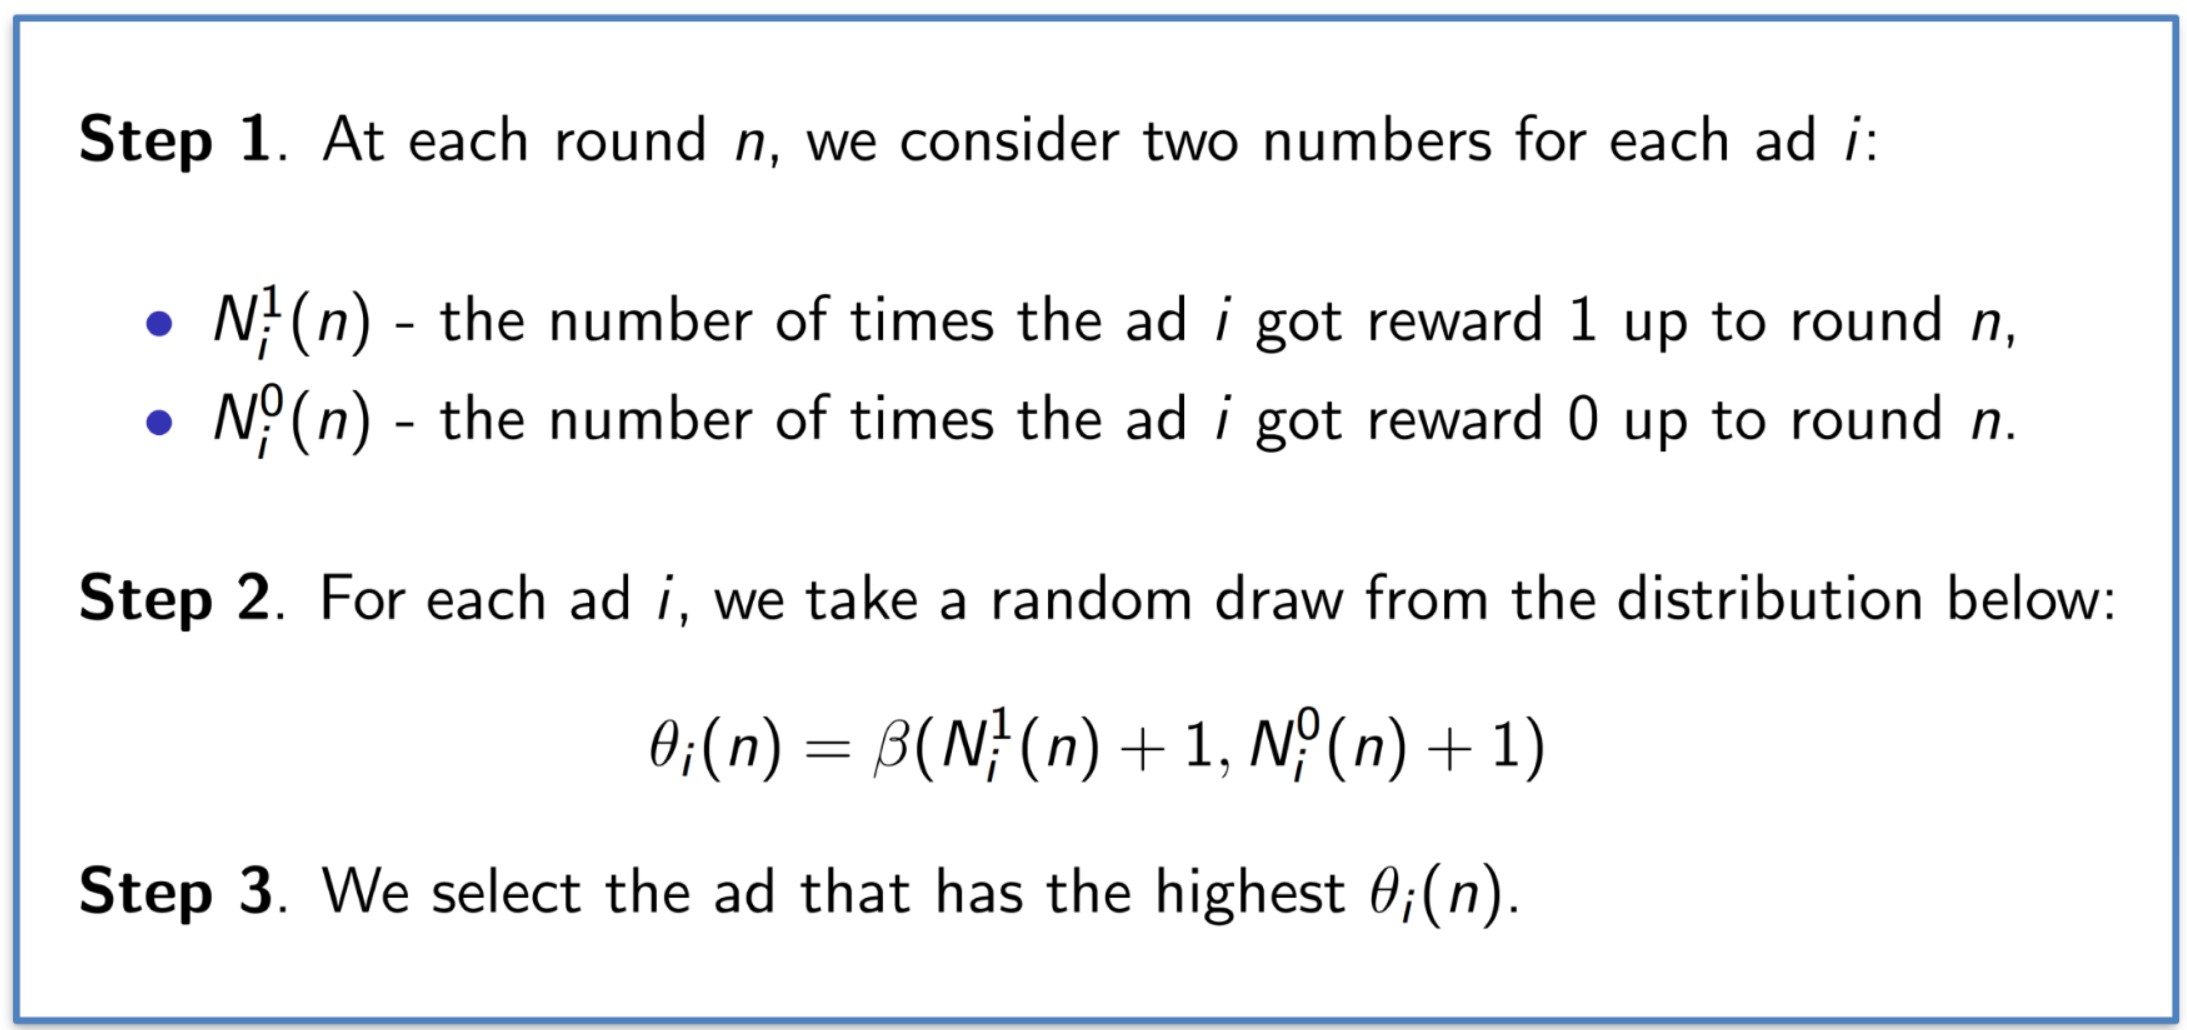

### Thompson Sampling Algorithm

Thompson Sampling is a probabilistic algorithm used for solving multi-armed bandit problems. It leverages Bayesian inference to balance exploration and exploitation by sampling from the posterior distribution of the reward probabilities for each action.

### Detailed Explanation

#### Key Concepts

1. **Exploration vs. Exploitation**:
   - **Exploration**: Trying different actions to gather more information.
   - **Exploitation**: Choosing the action that has given the best results so far.

2. **Bayesian Inference**:
   - Uses prior knowledge to update beliefs based on observed data.
   - In this context, updates the probability distribution of rewards for each action.

3. **Beta Distribution**:
   - Beta distribution is used to model the distribution of probabilities.
   - Parameters \( \alpha \) (number of successes + 1) and \( \beta \) (number of failures + 1).

#### Thompson Sampling Formula

For each action \( i \):
- Sample a probability \( p_i \) from the Beta distribution:
\[ p_i = \text{Beta}(\alpha_i, \beta_i) \]
Where:
  - \( \alpha_i \) is the number of rewards (successes) for action \( i \) + 1.
  - \( \beta_i \) is the number of non-rewards (failures) for action \( i \) + 1.

#### Steps of the Thompson Sampling Algorithm

1. **Initialization**:
   - Set the initial number of rewards (successes) and non-rewards (failures) for each action to zero.

2. **Selection**:
   - For each round \( n \):
     - Sample a probability from the Beta distribution for each action.
     - Select the action with the highest sampled probability.

3. **Update**:
   - Update the number of rewards (successes) or non-rewards (failures) for the selected action based on the observed reward.
   - Update the total reward.

In [4]:
N: int = 10000
d: int = 10
ads_selected: list[int] = []
numbers_of_rewards_1: list[int] = [0] * d
numbers_of_rewards_0: list[int] = [0] * d
total_reward: int = 0

for n in range(0, N):
  ad: int = 0
  max_random: int = 0

  for i in range(0, d):
    random_beta: float = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    
    # select the ad with the highest random_beta
    if (random_beta > max_random):
      max_random: float = random_beta
      ad: int = i
  ads_selected.append(ad)
  reward: int = dataset.values[n, ad]

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward: int = total_reward + reward

## Visualising the Results - Histogram

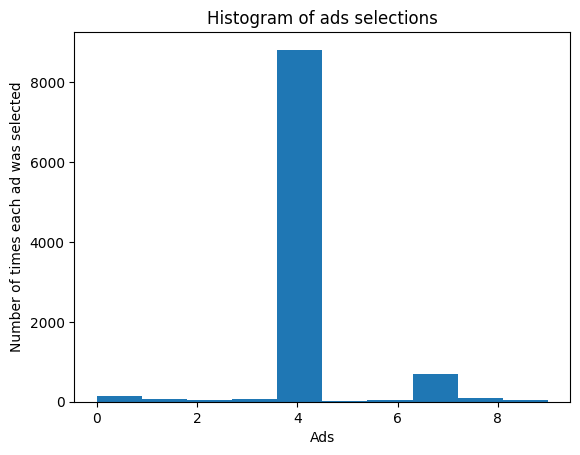

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()